### Consider a 5 year plan of operation

In [1]:
import pandas as pd
import numpy as np

In [2]:
plan_years = 5

In [3]:
df = pd.DataFrame()

In [4]:
SP_capital_cost = 210 # solar panel cost
SP_panels_number = 500 # number of solar panels
SP_om_cost = 0.01*SP_capital_cost*SP_panels_number*plan_years # operation and maintanance const per year - 1%

battery_cost = 18000
batteries_number = 2
battery_om_cost = 120*batteries_number*plan_years

generator_cost = 15000
generator_number = 2
generator_fuel_consumption = 8.8 # m^3/hr
generator_op_time = 3.5 * 30 * 24 * plan_years # in winter time (3 months + 1/2 emergency shortages)
generator_om_cost = 110*generator_number*plan_years

fuel_cost = 0.3 # per m^3

In [5]:
generator_op_time

12600.0

In [6]:
df.loc['Materials', 'Value'] = fuel_cost*generator_fuel_consumption*generator_op_time
df.loc['materials: natural gas', 'Value'] = df.loc['Materials', 'Value']

In [7]:
df.loc['Equipment', 'Value'] = (SP_capital_cost*SP_panels_number) +(
    battery_cost*batteries_number) + (generator_cost*generator_number)
df.loc['solar panels', 'Value'] = SP_capital_cost*SP_panels_number
df.loc['generators', 'Value'] = generator_cost*generator_number
df.loc['batteries', 'Value'] = battery_cost*batteries_number

In [8]:
df.loc['Labor', 'Value'] = df.loc['Equipment', 'Value']*5*0.01
df.loc['installation and maintenance', 'Value'] = df.loc['Labor', 'Value']

In [9]:
df.loc['Operations and maintanace', 'Value'] = SP_om_cost + battery_om_cost + generator_om_cost
df.loc['solar arrays maintenance', 'Value'] = SP_om_cost
df.loc['generators maintenance', 'Value'] = generator_om_cost
df.loc['batteries maintenance', 'Value'] = battery_om_cost

df

,Value
Materials,33264.0
materials: natural gas,33264.0
Equipment,171000.0
solar panels,105000.0
generators,30000.0
batteries,36000.0
Labor,8550.0
installation and maintenance,8550.0
Operations and maintanace,7550.0
solar arrays maintenance,5250.0


In [10]:
idx = df.index.isin(['Materials', 'Equipment', 'Labor', 'Operations and maintanace'])
total_cost = df[idx].sum()[0]

In [11]:
total_cost/(100*8760*plan_years)

0.05031141552511416

#### In 5 years scenario each household pays 0.05 cents per hour for electricity supply

In [12]:
(total_cost/(100*plan_years))/(40*24*8760*plan_years)*1000

0.01048154490106545

#### Or 0.01 cents per kilowatt. Let's assume 20% of profit put on top

In [13]:
en_cost = (total_cost/(100*8760*plan_years))*1.2

revenue = en_cost*8760*plan_years*100 - total_cost
revenue

44072.79999999999

#### In 5 years we can expect to generate over 44k revenue. How fast will investment 'zeros'? meaning money spent initially will be paid out with no profit made

In [14]:
# in a year, that it 12 months we get a revenue
en_cost*8760*100

52887.36

In [15]:
# thus we need so much months to return initial investment
total_cost*12/(en_cost*8760*100)

50.0

That is in 4 years with 20% profit margin we can expect to start making pure profit

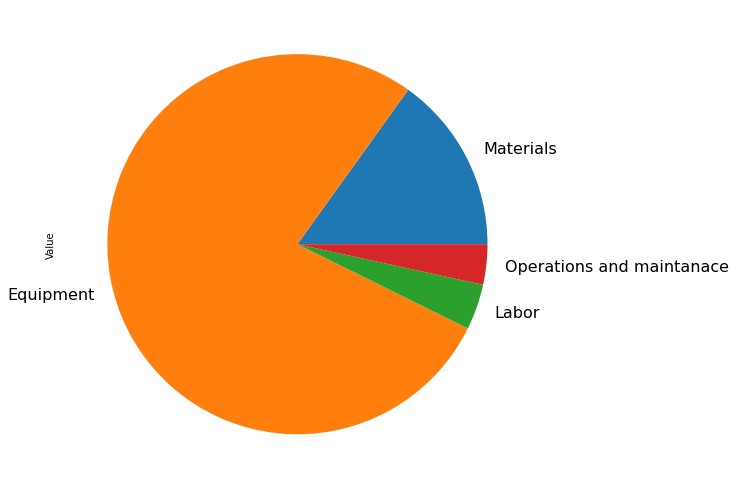

In [16]:
import matplotlib.pylab as plt

%matplotlib inline

df[idx].plot.pie(y='Value', fontsize=16, legend=False, figsize=(10,10));
plt.tight_layout();
plt.savefig('cost_breakdown_major.png');

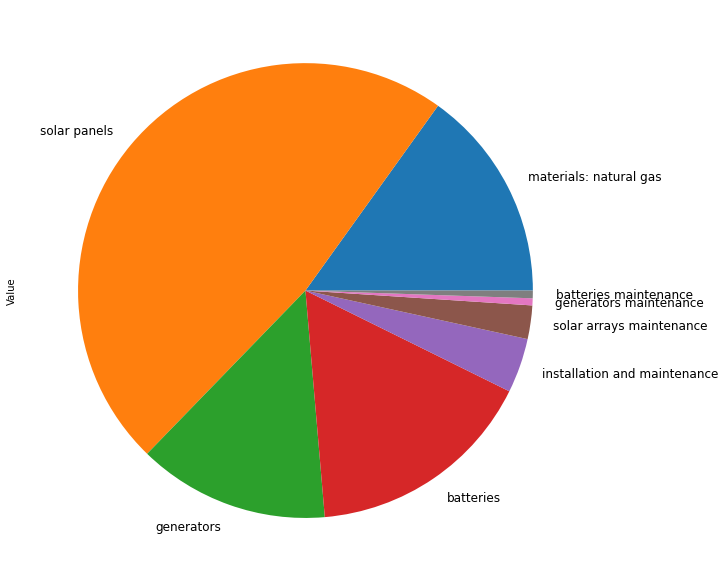

In [17]:
df[~idx].plot.pie(y='Value', fontsize=12, legend=False, figsize=(10,10));
plt.tight_layout();
plt.savefig('cost_breakdown_minor.png');

In [18]:
df['Percentage'] = 100*df.Value/total_cost

In [19]:
df

,Value,Percentage
Materials,33264.0,15.095025
materials: natural gas,33264.0,15.095025
Equipment,171000.0,77.598882
solar panels,105000.0,47.648436
generators,30000.0,13.613839
batteries,36000.0,16.336607
Labor,8550.0,3.879944
installation and maintenance,8550.0,3.879944
Operations and maintanace,7550.0,3.426149
solar arrays maintenance,5250.0,2.382422
